## Autoencoder simples digitos

## Instalando bibliotecas

In [1]:
!pip install -q tensorflow==2.16.1

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib

2025-01-20 15:08:13.557221: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-20 15:08:13.562676: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-20 15:08:13.619074: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-01-20 15:08:15.119546: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
tf.__version__, np.__version__, matplotlib.__version__

('2.16.1', '1.26.4', '3.8.4')

In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, InputLayer, Dense
import matplotlib.pyplot as plt

## Carregamento base de dados

In [5]:
(X_treinamento, _ ), (X_teste, _) = mnist.load_data()

In [6]:
X_treinamento.shape, X_teste.shape

((60000, 28, 28), (10000, 28, 28))

## Preprocessamento da base - normalizacao

In [7]:
X_treinamento = X_treinamento.astype('float32') / 255
X_teste = X_teste.astype('float32') / 255

In [8]:
X_treinamento.shape

(60000, 28, 28)

In [9]:
X_treinamento = X_treinamento.reshape((len(X_treinamento),np.prod(X_treinamento.shape[1:])))
X_treinamento.shape

(60000, 784)

In [10]:
X_teste = X_teste.reshape((len(X_teste),np.prod(X_teste.shape[1:])))
X_teste.shape

(10000, 784)

## Criação do Autoencoder

In [11]:
# 784 -> 128 -> 64 -> 32 -> 64 -> 128 -> 784
autoencoder = Sequential()

# Codificador
autoencoder.add(InputLayer(shape=(784,)))
autoencoder.add(Dense(units=128,activation='relu'))
autoencoder.add(Dense(units=64,activation='relu'))
autoencoder.add(Dense(units=32,activation='relu'))
# Decodificador
autoencoder.add(Dense(units=64,activation='relu'))
autoencoder.add(Dense(units=128,activation='relu'))
autoencoder.add(Dense(units=784,activation='relu'))

autoencoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
autoencoder.fit(X_treinamento,X_treinamento,epochs=50,batch_size=256,validation_data=(X_teste,X_teste))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.0051 - loss: 0.5103 - val_accuracy: 0.0074 - val_loss: 0.3499
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.0080 - loss: 0.3277 - val_accuracy: 0.0058 - val_loss: 0.3035
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.0096 - loss: 0.3107 - val_accuracy: 0.0071 - val_loss: 0.3221
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.0084 - loss: 0.3114 - val_accuracy: 0.0080 - val_loss: 0.2996
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.0088 - loss: 0.2957 - val_accuracy: 0.0094 - val_loss: 0.2846
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.0088 - loss: 0.2861 - val_accuracy: 0.0095 - val_loss: 0.2859
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.0093 - loss: 0.2827 - val_accuracy: 0.0082 - val_loss: 0.2777
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.0062 - loss: 0.2902 - val_accu

## Visualizar resultados

In [14]:
# 784 -> 128 -> 64 -> 32
dimensao_original = Input(shape=(784,))
camada_encoder1 = autoencoder.layers[0]
camada_encoder2 = autoencoder.layers[1]
camada_encoder3 = autoencoder.layers[2]

encoder = Model(dimensao_original,camada_encoder3(camada_encoder2(camada_encoder1(dimensao_original))))

encoder.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,816 (432.88 KB)

 Trainable params: 110,816 (432.88 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
imagens_codificadas = encoder.predict(X_teste)
imagens_codificadas.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


(10000, 32)

In [16]:
imagens_decodificadas = autoencoder.predict(X_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [17]:
numero_imagens = 10
imagens_teste = np.random.randint(X_teste.shape[0],size=numero_imagens)

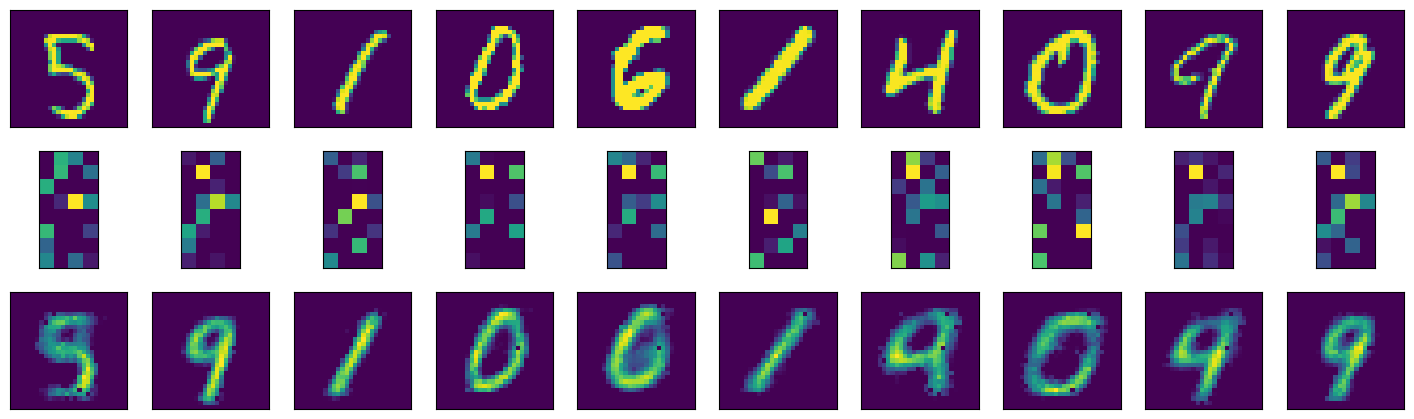

In [18]:
plt.figure(figsize=(18,18))
for i,indice_imagem in enumerate(imagens_teste):
    # Imagem original 
    eixo = plt.subplot(10,10, i+1)
    plt.imshow(X_teste[indice_imagem].reshape(28,28))
    plt.xticks(())
    plt.yticks(())

    # Imagem codificada
    eixo = plt.subplot(10,10,i+1+numero_imagens)
    plt.imshow(imagens_codificadas[indice_imagem].reshape(8,4))
    plt.xticks(())
    plt.yticks(())

    # Imagem reconstruida 
    eixo = plt.subplot(10,10,i+1+numero_imagens*2)
    plt.imshow(imagens_decodificadas[indice_imagem].reshape(28,28))
    plt.xticks(())
    plt.yticks(())